# **G2M: Cab Industry**

#Week 2

# Submitted By:Kenan Fatih Giray

# **Case for Dataset:**

# The two main types of cab companies in the US are Pink Cab and Yellow Cab. Our challenge is determining which cab firm would be a wise investment. To do this, we need to determine the benefits (profits) of that vehicle above the competition. We would put our money into whichever cab company appears to be the most valuable in the market.



# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Datasets**

In [2]:
df_cab=pd.read_csv("/content/Cab_Data.csv")
df_city=pd.read_csv("/content/City.csv")
df_CustomerID=pd.read_csv("/content/Customer_ID.csv")
df_Transaction_ID=pd.read_csv("/content/Transaction_ID.csv")

In [3]:
df_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


# **Checking The Shape and Size of the Cab Dataset**

In [4]:
df_cab.ndim

2

In [5]:
df_cab.shape

(359392, 7)

In [6]:
print("Row Number:", df_cab.shape[0])
print("Column Number:",df_cab.shape[1])

Row Number: 359392
Column Number: 7


# **Date Handling**

In [7]:
print("Min_Date:{},Max_Date:{}".format(df_cab["Date of Travel"].min(),df_cab["Date of Travel"].max()))

Min_Date:42371,Max_Date:43465


In [8]:
Min_Date=df_cab["Date of Travel"].min()
Max_Date=df_cab["Date of Travel"].max()

In [9]:
New_Date_Min=dt.fromordinal(dt(1899,12, 31).toordinal()+Min_Date).strftime("%d-%m-%Y")
New_Date_Max=dt.fromordinal(dt(1899,12,31).toordinal()+Max_Date).strftime("%d-%m-%Y")

In [10]:
New_Date_Min

'03-01-2016'

In [11]:
New_Date_Max

'01-01-2019'

In [12]:
def new_dates(date):
  conversion=dt.fromordinal(dt(1899,12, 31).toordinal()+date).strftime("%m-%d-%Y")
  return conversion


In [13]:
df_cab["Date of Travel"]=df_cab["Date of Travel"].apply(new_dates)

In [14]:
df_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01-09-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,01-07-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,01-03-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,01-08-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,01-04-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,01-09-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,01-05-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,01-06-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,01-06-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


# **Checking Other Datasets**

In [15]:
df_city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


# **Handling Population and Users Data**

In [16]:
df_city["Users"]=df_city["Users"].transform(lambda x:int(x.replace(",","")) )
df_city["Population"]=df_city["Population"].transform(lambda x: int(x.replace(",","")))
df_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [17]:
df_city_copy=df_city.copy()
df_cab_copy=df_cab.copy()
df_CustomerID_copy=df_CustomerID.copy()
df_Transaction_ID_copy=df_Transaction_ID.copy()

In [18]:
df_CustomerID

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [19]:
df_Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


# **Combining Datasets By Using Inner Joint**

In [20]:
df_Tran_Cust = pd.merge(df_Transaction_ID, df_CustomerID, on='Customer ID')
df_Tran_Cust

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713
440094,10439820,14971,Card,Male,30,15346
440095,10439838,41414,Card,Male,38,3960
440096,10439840,41677,Cash,Male,23,19454


In [21]:
df_cab_Tran_Cust = pd.merge(df_cab, df_Tran_Cust, on='Transaction ID')
df_cab_Tran_Cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,01-09-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,01-07-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,01-03-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,01-08-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,01-04-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,01-09-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,01-05-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,01-06-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,01-06-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [22]:
df_cab_Tran_Cust_city = pd.merge(df_cab_Tran_Cust, df_city, on='City')
df_cab_Tran_Cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,01-09-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,01-07-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,01-03-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,01-08-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,01-04-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,01-09-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,01-05-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,01-06-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,01-06-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


# **Adding Additional Columns**

In [23]:
df_cab_Tran_Cust_city['Profit'] = df_cab_Tran_Cust_city['Price Charged'] - df_cab_Tran_Cust_city['Cost of Trip']


In [24]:
df_cab_Tran_Cust_city['Date of Travel']=pd.to_datetime(df_cab_Tran_Cust_city['Date of Travel'])


In [25]:
df_cab_Tran_Cust_city['Day'] = df_cab_Tran_Cust_city['Date of Travel'].dt.day

In [26]:
df_cab_Tran_Cust_city['Year'] = df_cab_Tran_Cust_city['Date of Travel'].dt.year
df_cab_Tran_Cust_city['Month'] = df_cab_Tran_Cust_city['Date of Travel'].dt.month

In [27]:
df_cab_Tran_Cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Day,Year,Month
0,10000011,2016-01-09,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,9,2016,1
1,10000012,2016-01-07,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,7,2016,1
2,10000013,2016-01-03,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701,27.5680,3,2016,1
3,10000014,2016-01-08,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701,25.7980,8,2016,1
4,10000015,2016-01-04,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701,16.8440,4,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-09,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001,5.8800,9,2018,1
359388,10440104,2018-01-05,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001,6.9020,5,2018,1
359389,10440105,2018-01-06,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001,87.4200,6,2018,1
359390,10440106,2018-01-06,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001,32.1420,6,2018,1


# **EDA for Dataset**

In [32]:
df=df_cab_Tran_Cust_city

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,1.268058e+05,10000011.00,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.90,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.60,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.00,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Customer ID,359392.0,1.919165e+04,2.101241e+04,1.00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,1.259423e+01,18.00,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.00,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04
Population,359392.0,3.132198e+06,3.315194e+06,248968.00,6.712380e+05,1.595037e+06,8.405837e+06,8.405837e+06
Users,359392.0,1.583656e+05,1.008501e+05,3643.00,8.002100e+04,1.441320e+05,3.021490e+05,3.021490e+05
Profit,359392.0,1.372532e+02,1.603118e+02,-220.06,2.801200e+01,8.196200e+01,1.900300e+02,1.463966e+03


# **Duplicated Data Control**

In [29]:
df.duplicated().sum()

0

# **Checking Missing Values**

In [35]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
Day                   0
Year                  0
Month                 0
dtype: int64

In [34]:
df.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Profit                0
Day                   0
Year                  0
Month                 0
dtype: int64

# **Numerical Values**

In [36]:
num_cols=["Price Charged","KM Travelled","Cost of Trip","Age","Income (USD/Month)","Population","Users","Profit"]

# **Outlier Detection**

In [37]:
def OTH(df,col_name, low_quantile=0.25,up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    print(col_name,low_limit,up_limit)
    return low_limit,up_limit


In [38]:
def detection(dataframe,col_name):
    low_limit,up_limit=OTH(dataframe,col_name)
    if dataframe[(dataframe[col_name]>up_limit)| (dataframe[col_name]<low_limit)].any(axis=None):
                                                  return True
    else:
                                                  return False


In [39]:
for col in num_cols:
    print(col,detection(df,col))


Price Charged -359.39625 1149.49375
Price Charged True
KM Travelled -19.44 64.4
KM Travelled False
Cost of Trip -242.52480000000003 807.408
Cost of Trip False
Age -0.5 67.5
Age False
Income (USD/Month) -10492.5 39951.5
Income (USD/Month) False
Population -10930660.5 20007735.5
Population False
Users -253171.0 635341.0
Users False
Profit -215.01499999999996 433.0569999999999
Profit True


## Price Charged and Profit Columns have some Outliers

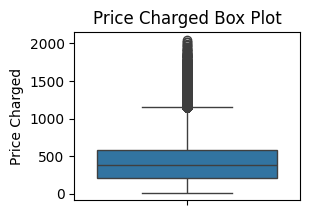

In [40]:
plt.subplot(2,2,1)
sns.boxplot(y="Price Charged",data=df)
plt.title("Price Charged Box Plot");

# **Correlation Between Numerical Values**

<Axes: >

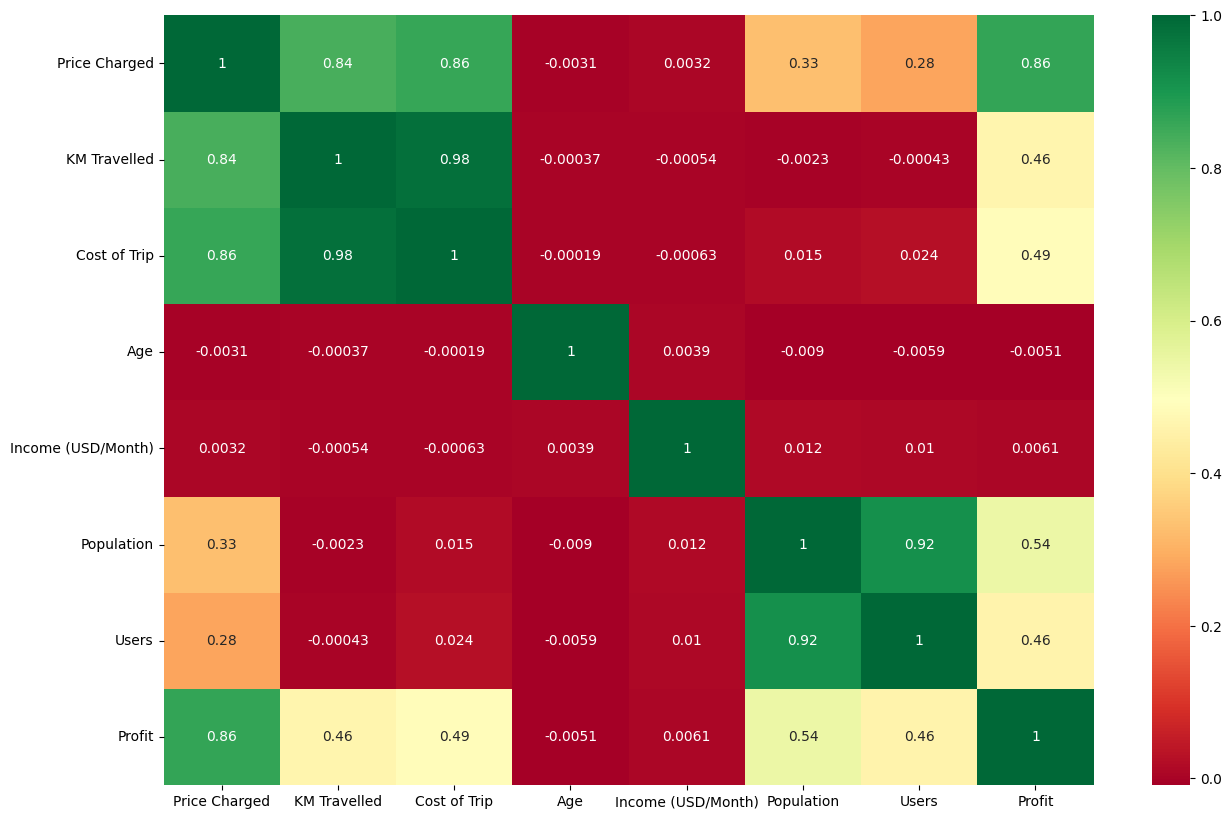

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="RdYlGn", ax=ax)

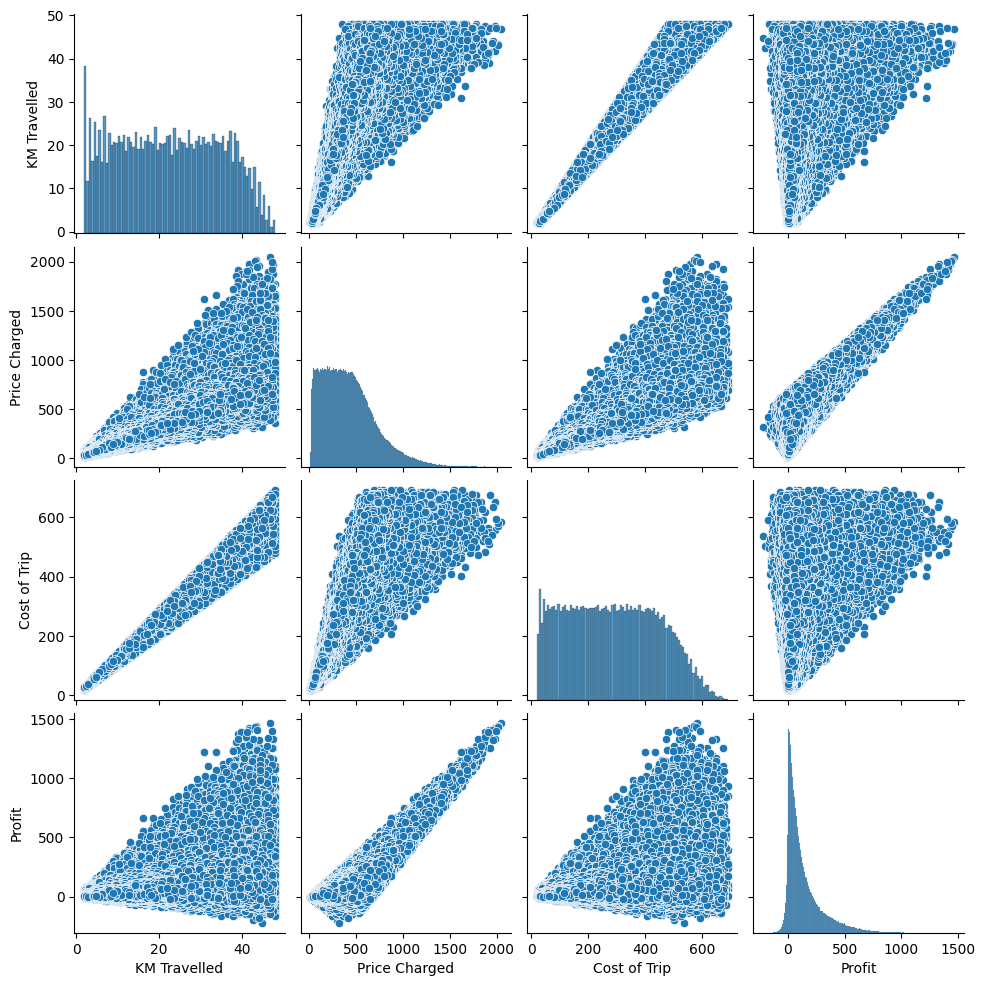

In [42]:
sns.pairplot(data=df[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']])
plt.show()

# **CONCLUSION**: As we can see from heatmap and pairplots, Cost of Trip and Price charged are related with **KM travelled**. Moreover, there is also a high correlation between **Population** and **Users**.

# **Converting Objects to Categorical Data**

In [43]:
obj_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for colname in obj_col:
    df[colname]=df[colname].astype('category')



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  category      
 3   City                359392 non-null  category      
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  category      
 9   Gender              359392 non-null  category      
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  int64         
 13  Users               359392 no

# **Categorical Columns Analysis**

In [45]:
cat_col=list(df.select_dtypes(["category"]).columns)

In [46]:
for name in cat_col:
    print(f"*************{name}****************")
    print("TOTAL: ", df[name].count())
    print(df[name].value_counts())

*************Company****************
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
*************City****************
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
*************Payment_Mode****************
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
*************Gender****************
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64


# **CONCLUSION**:The quantity of categorical data for each datafield is clearly visible. Among the admirable observations are: There are just two kinds of taxi companies: Pink Cab and Yellow Cab. The clients tend to favor Yellow Cab. Payment_Mode: A third of a cash payment is made using a card. Additionally, the ratio of male to female customers is about 4:3.


# **Customer Numbers Comparison**

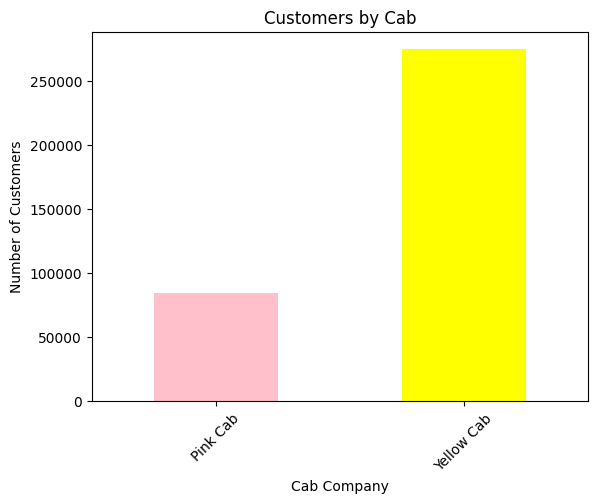

In [47]:
df['Company'].value_counts(ascending=True).plot(kind='bar', color=['pink', 'yellow'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Number of Customers')
plt.title('Customers by Cab')
plt.show()

# Since Yellow Cab number is higher than Pink Cab number, it is better to compare average customer numbers for both cabs.

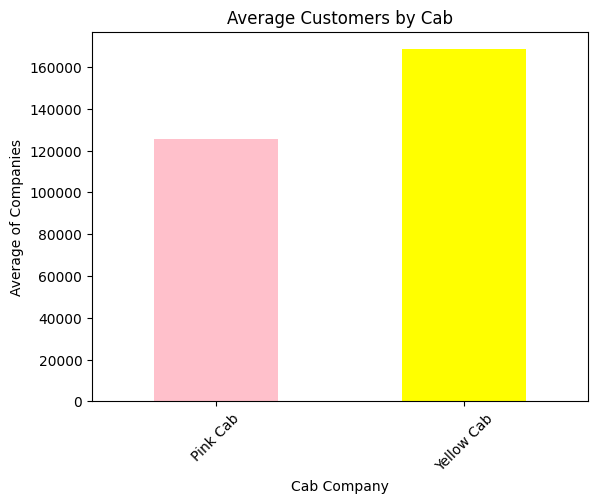

In [48]:
df.groupby(df["Company"])["Users"].mean().plot(kind='bar', color=['pink', 'yellow'], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Average of Companies')
plt.title('Average Customers by Cab')
plt.show()

# As we can see, gap between cabs decreased significantly.

# **Pink and Yellow Cabs Comparison by Gender of Users**

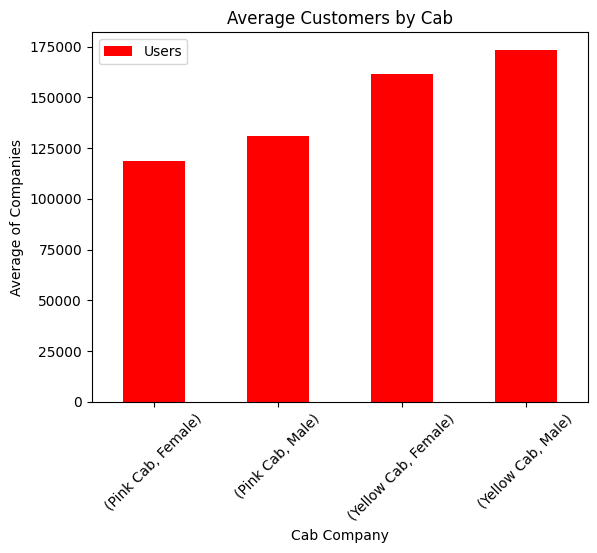

In [49]:
df.groupby(["Company","Gender"]).aggregate({"Users":"mean"}).plot.bar(color=["Red"], rot=45)
plt.xlabel('Cab Company')
plt.ylabel('Average of Companies')
plt.title('Average Customers by Cab')
plt.show()

# **Comparing Average Profits of Both Cabs by Year**

In [50]:
df['Year'].value_counts()

2017    128586
2018    124034
2016    106516
2019       256
Name: Year, dtype: int64

In [51]:
pinkprofit=df[df.Company=='Pink Cab'].groupby(df['Year']).Profit.mean()
yellowprofit=df[df.Company=='Yellow Cab'].groupby('Year').Profit.mean()
print("Pink Cab Profit:\n", pinkprofit)
print("\nYellow Cab Profit:\n", yellowprofit)

Pink Cab Profit:
 Year
2016    67.973254
2017    67.103261
2018    53.537172
2019    76.623379
Name: Profit, dtype: float64

Yellow Cab Profit:
 Year
2016    169.311790
2017    168.855795
2018    143.669510
2019     89.836398
Name: Profit, dtype: float64


# **Pink Cab Average Profit by Year**

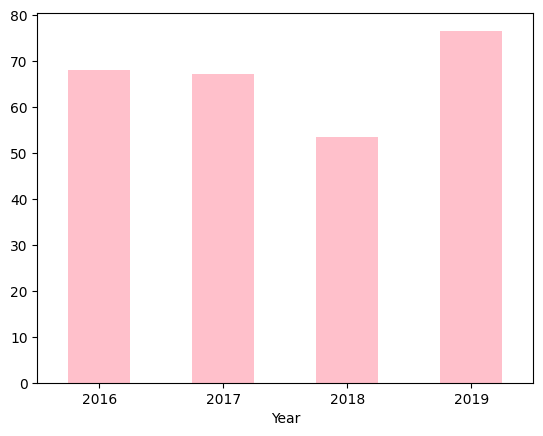

In [52]:
ax = pinkprofit.plot.bar(rot=0,color="pink")

# **Yellow Cab Average Profit by Year**

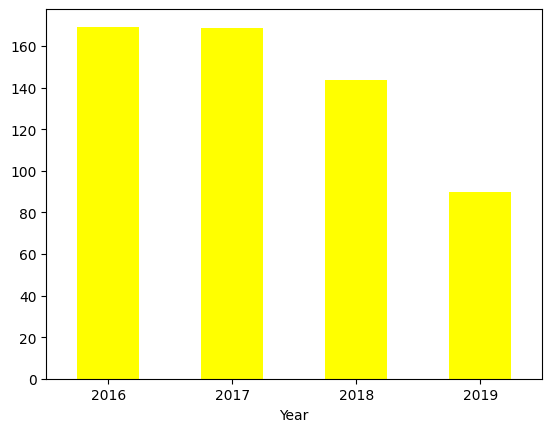

In [53]:
ax = yellowprofit.plot.bar(rot=0,color="yellow")

# **CONCLUSION**: As we can see, although Yellow Cabs had higher profit in all years, It has a strong decreasing trend.Meanwhile Pink Cabs have an increase trend.

# **Comparing Travel Frequencies of Both Cabs by Month**

In [54]:
date_trans=df.groupby('Date of Travel')['Transaction ID'].count().sort_values(ascending=False)
date_trans

Date of Travel
2018-01-06    2022
2017-12-16    1123
2017-12-09    1100
2018-12-16    1086
2017-11-25    1085
              ... 
2016-01-20      88
2016-01-13      86
2016-01-12      85
2016-01-06      47
2016-01-05      25
Name: Transaction ID, Length: 1095, dtype: int64

In [55]:
mtr=df.groupby(['Month',"Company"])["Transaction ID"].count()
mtr

Month  Company   
1      Pink Cab       5391
       Yellow Cab    19047
2      Pink Cab       3383
       Yellow Cab    15065
3      Pink Cab       4097
       Yellow Cab    16770
4      Pink Cab       4054
       Yellow Cab    17477
5      Pink Cab       5065
       Yellow Cab    19189
6      Pink Cab       5654
       Yellow Cab    18155
7      Pink Cab       6721
       Yellow Cab    21479
8      Pink Cab       7630
       Yellow Cab    23375
9      Pink Cab       9734
       Yellow Cab    27404
10     Pink Cab      10612
       Yellow Cab    30355
11     Pink Cab      10854
       Yellow Cab    31180
12     Pink Cab      11516
       Yellow Cab    35185
Name: Transaction ID, dtype: int64

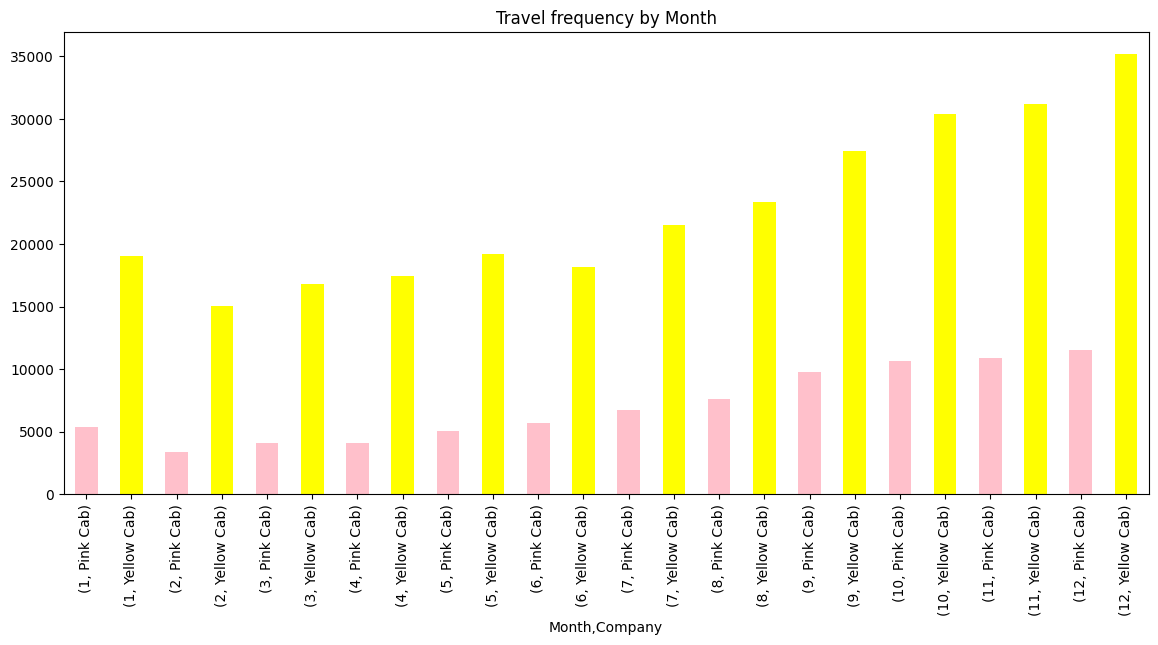

In [56]:
plt.figure(figsize=(14,6))
mtr.plot.bar(color=["pink","Yellow"])
plt.title('Travel frequency by Month')
plt.show()

# **CONCLUSION**: While both cabs' travelling frequency is maximum in december, it becomes minimum in february

# **Comparing Travel Frequencies of Both Cabs by Year**

In [57]:
ytr=df.groupby(['Year',"Company"])['Transaction ID'].count()
ytr

Year  Company   
2016  Pink Cab      24907
      Yellow Cab    81609
2017  Pink Cab      30314
      Yellow Cab    98272
2018  Pink Cab      29432
      Yellow Cab    94602
2019  Pink Cab         58
      Yellow Cab      198
Name: Transaction ID, dtype: int64

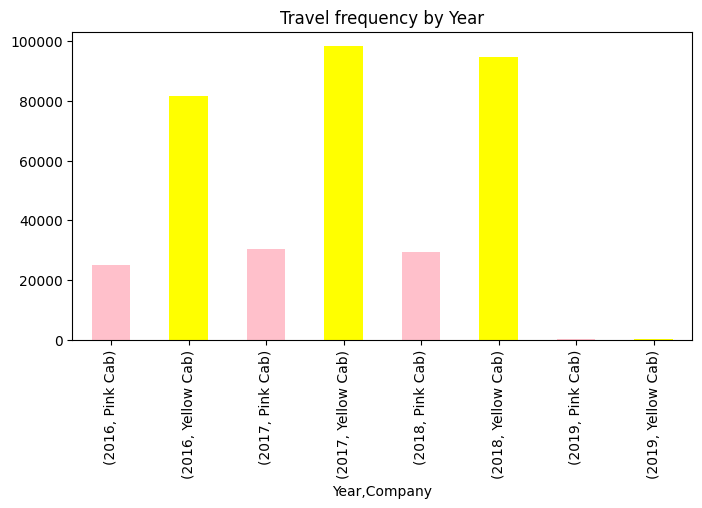

In [58]:
plt.figure(figsize=(8,4))
ytr.plot.bar(color=["pink","Yellow"])
plt.title('Travel frequency by Year')
plt.show()

# **CONCLUSION**: Both cabs' travelling frequency is maximum in 2017

# **City Analysis**

In [59]:
city = df.groupby('City')['Transaction ID'].count().sort_values(ascending=False)
city

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: Transaction ID, dtype: int64

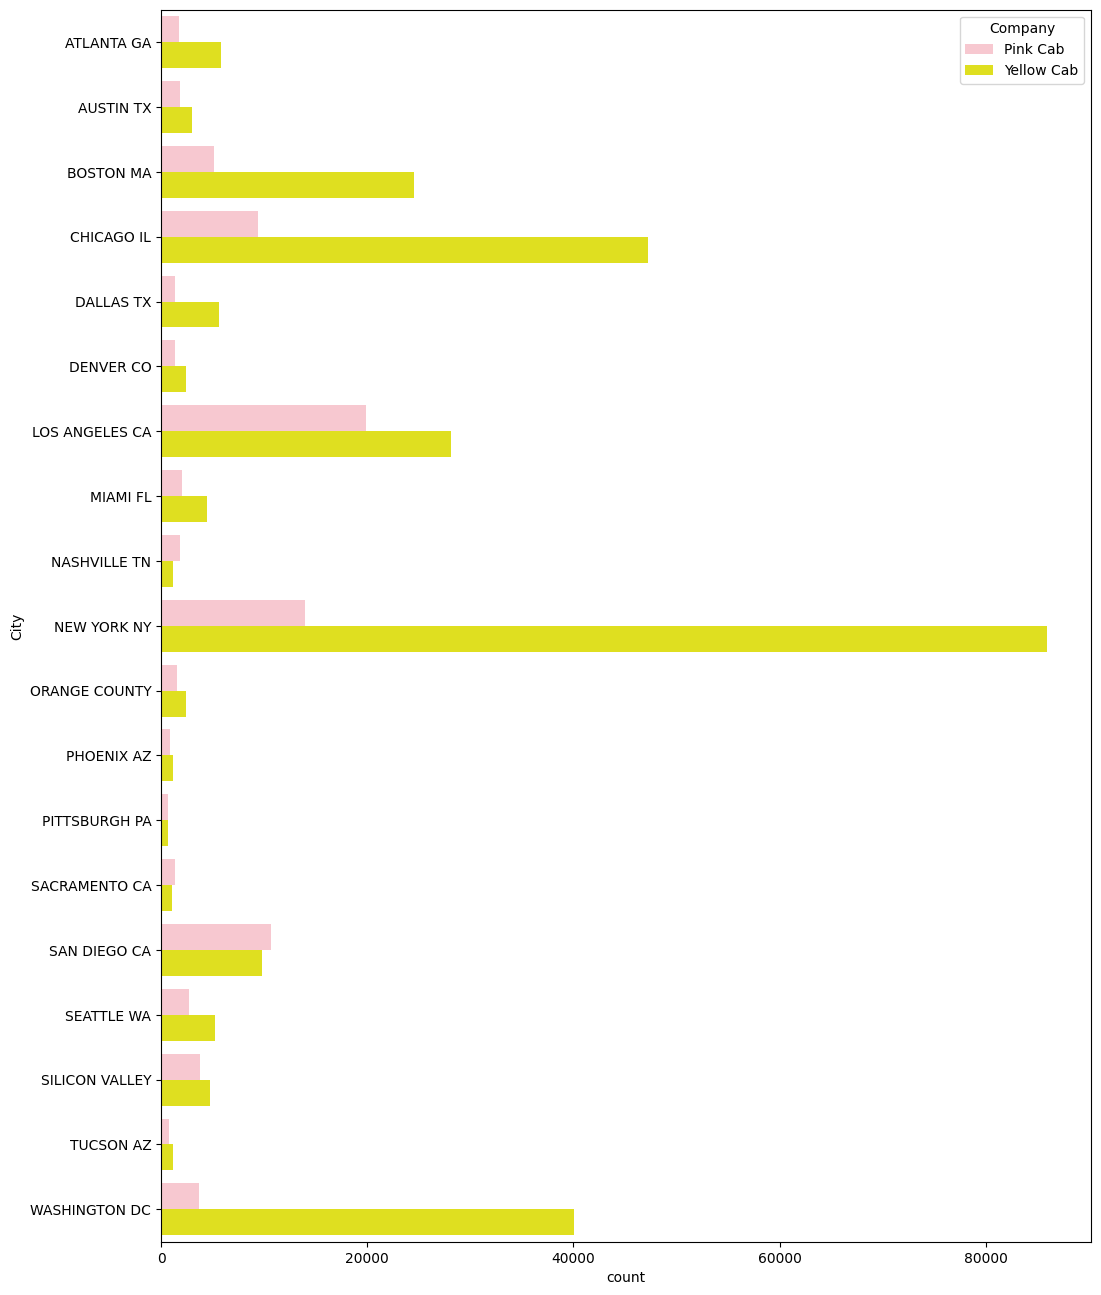

In [60]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Company', data=df,palette=["pink","yellow"])
plt.show()

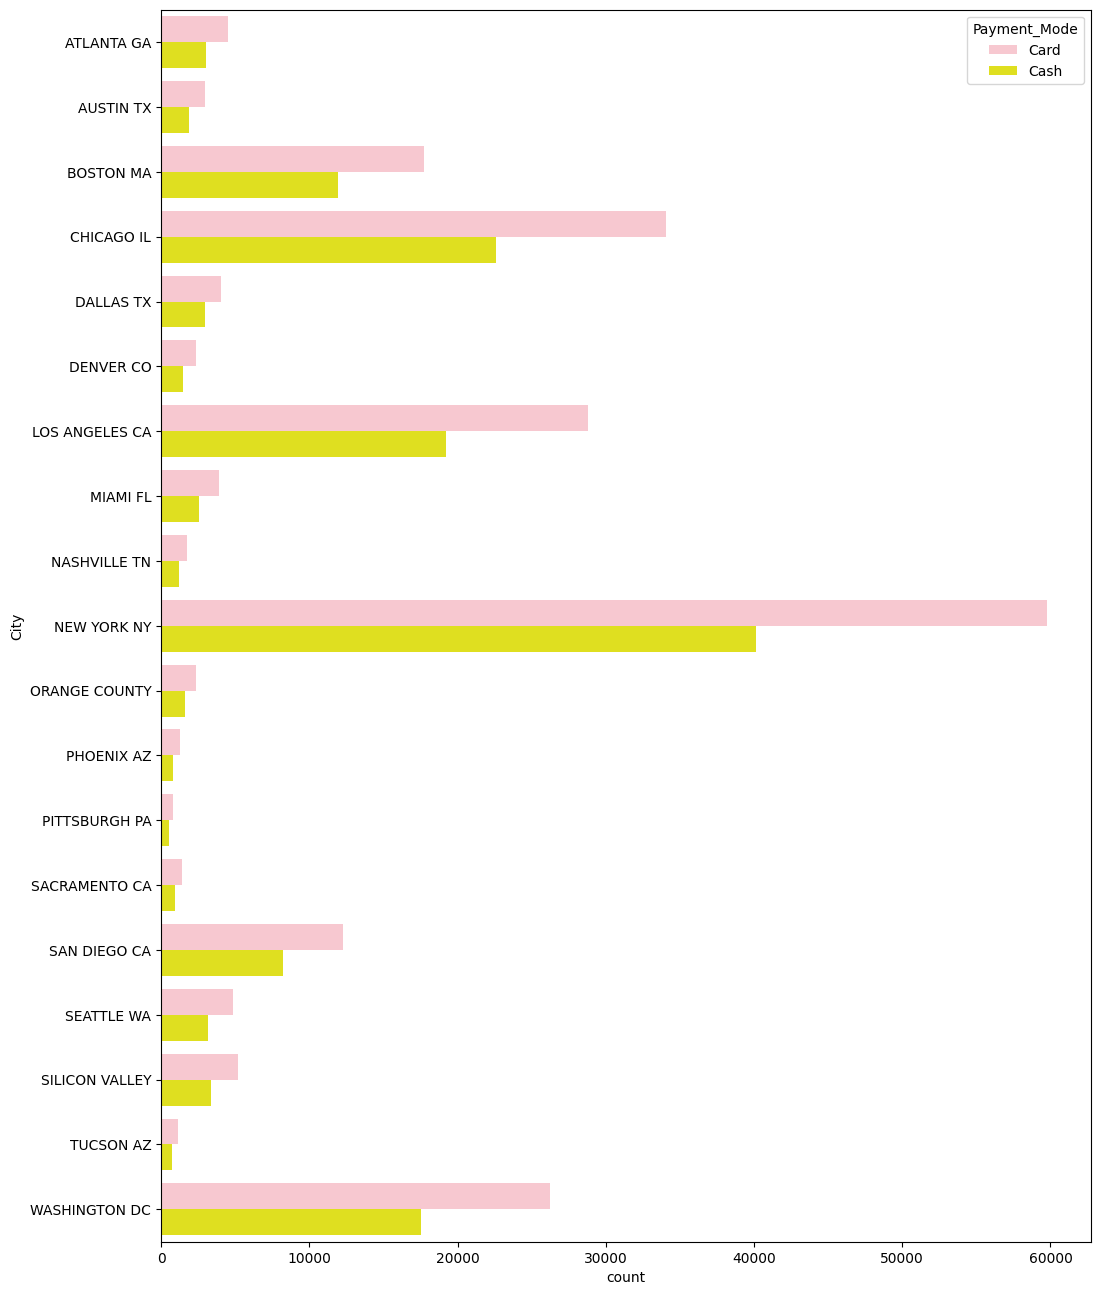

In [61]:
f, ax = plt.subplots(figsize=(12, 16))
ax = sns.countplot(y='City', hue='Payment_Mode', data=df,palette=["pink","yellow"])
plt.show()

# As we can see, in all cities, credit cards were prefered over cash

# **Profit Comparison by Cities**

In [62]:
pinkprofit=df[df.Company=='Pink Cab'].groupby(df['City']).Profit.mean()
yellowprofit=df[df.Company=='Yellow Cab'].groupby('City').Profit.mean()
print("Pink Cab Profit:\n", pinkprofit)
print("\nYellow Cab Profit:\n", yellowprofit)

Pink Cab Profit:
 City
ATLANTA GA         54.511961
AUSTIN TX          78.932168
BOSTON MA          50.520960
CHICAGO IL         34.047910
DALLAS TX          17.920371
DENVER CO          29.114016
LOS ANGELES CA     56.669120
MIAMI FL           81.069526
NASHVILLE TN       34.918269
NEW YORK NY       108.217540
ORANGE COUNTY      67.412976
PHOENIX AZ         41.199530
PITTSBURGH PA      25.084660
SACRAMENTO CA      41.472273
SAN DIEGO CA       59.772280
SEATTLE WA         41.281601
SILICON VALLEY     89.610358
TUCSON AZ          74.204725
WASHINGTON DC      52.482761
Name: Profit, dtype: float64

Yellow Cab Profit:
 City
ATLANTA GA        128.797723
AUSTIN TX         125.249582
BOSTON MA          61.483619
CHICAGO IL         64.924486
DALLAS TX         195.849415
DENVER CO         146.853175
LOS ANGELES CA    116.656368
MIAMI FL          133.872429
NASHVILLE TN       72.923597
NEW YORK NY       307.864252
ORANGE COUNTY     143.785355
PHOENIX AZ        131.120407
PITTSBURGH PA     107.8

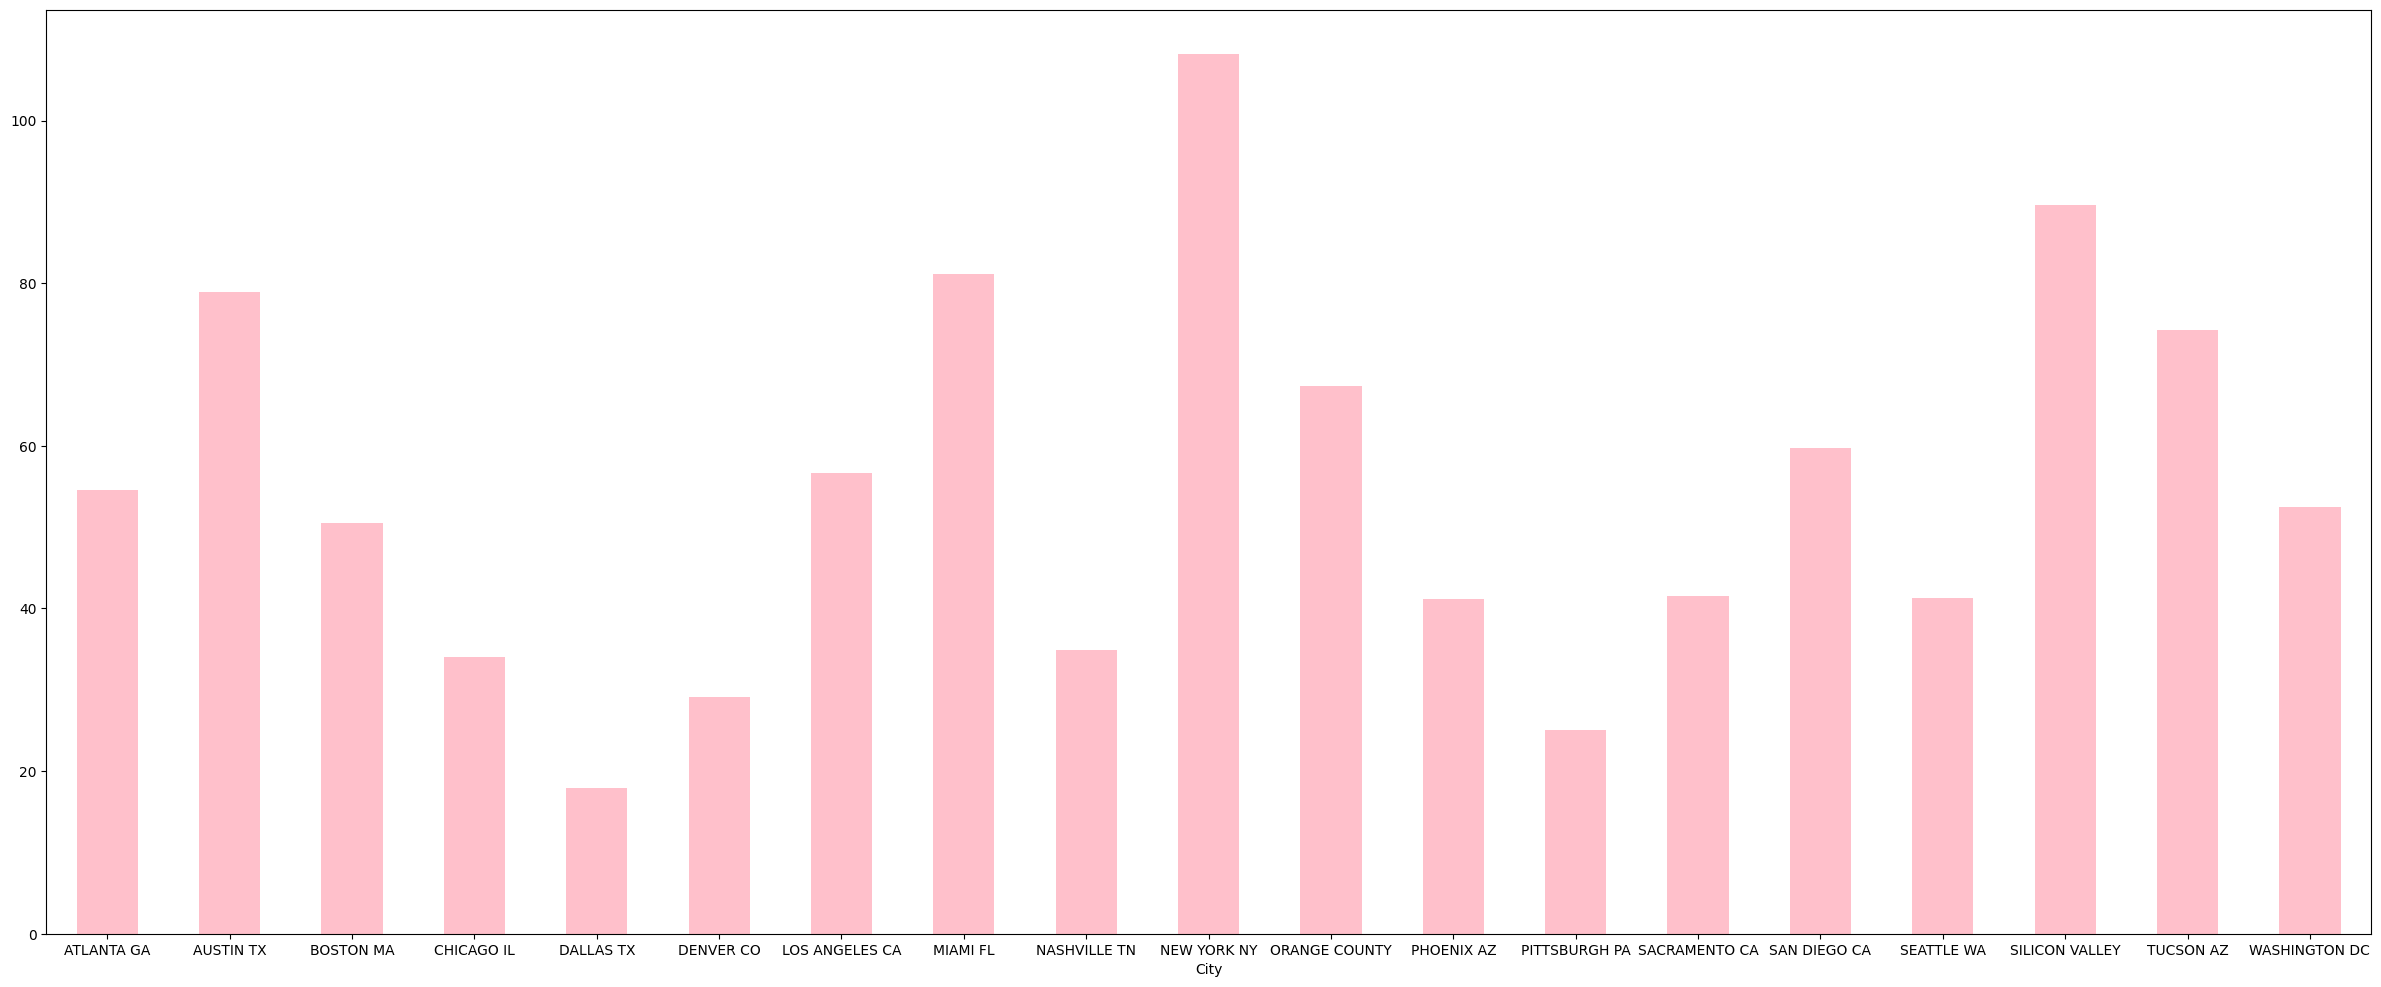

In [63]:
f, ax = plt.subplots(figsize=(30, 12))
ax = pinkprofit.plot.bar(rot=0,color="pink")

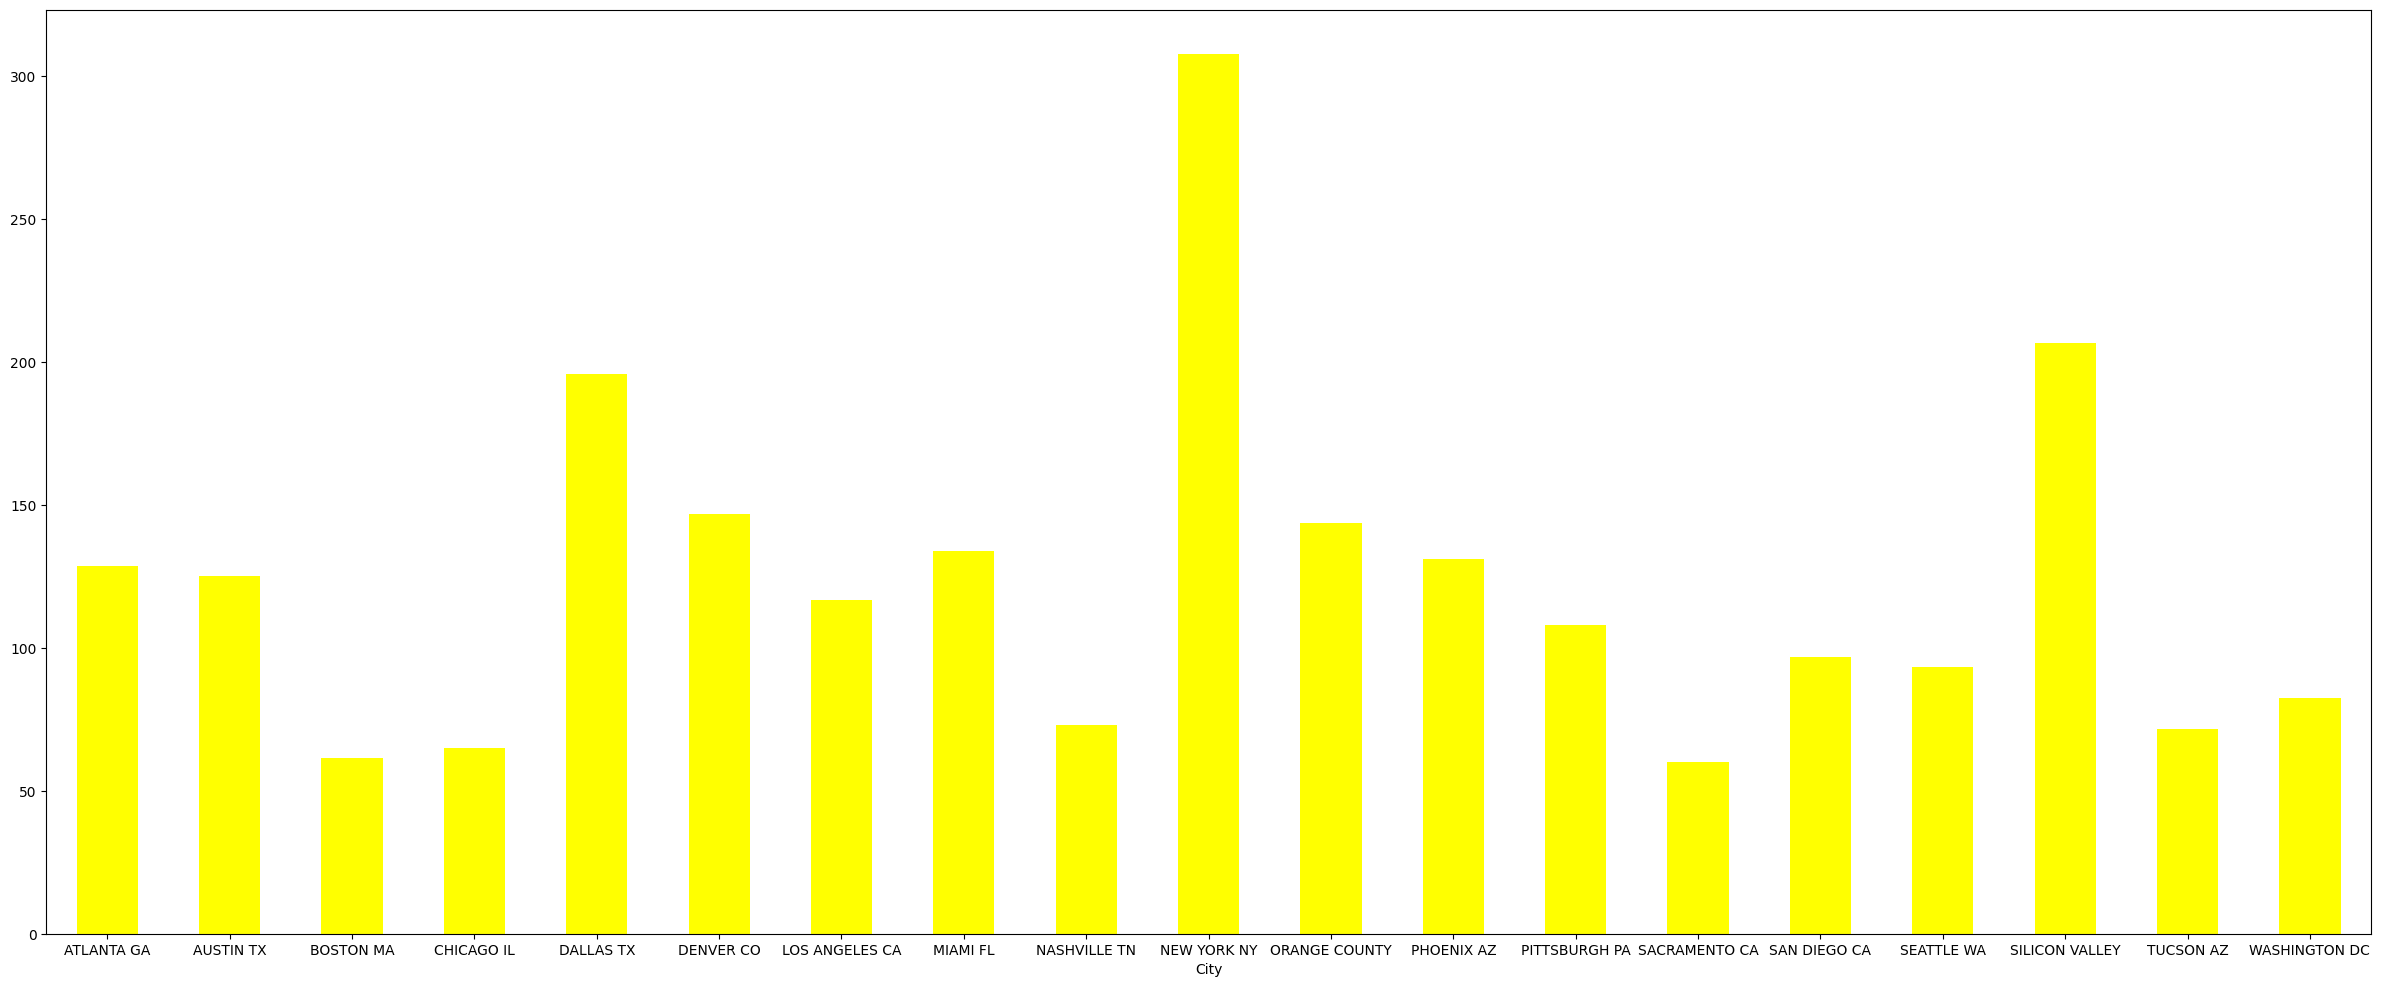

In [64]:
f, ax = plt.subplots(figsize=(30, 12))
ax = yellowprofit.plot.bar(rot=0,color="yellow")

In [65]:
pop_data=df.groupby("City")["Population"].mean()

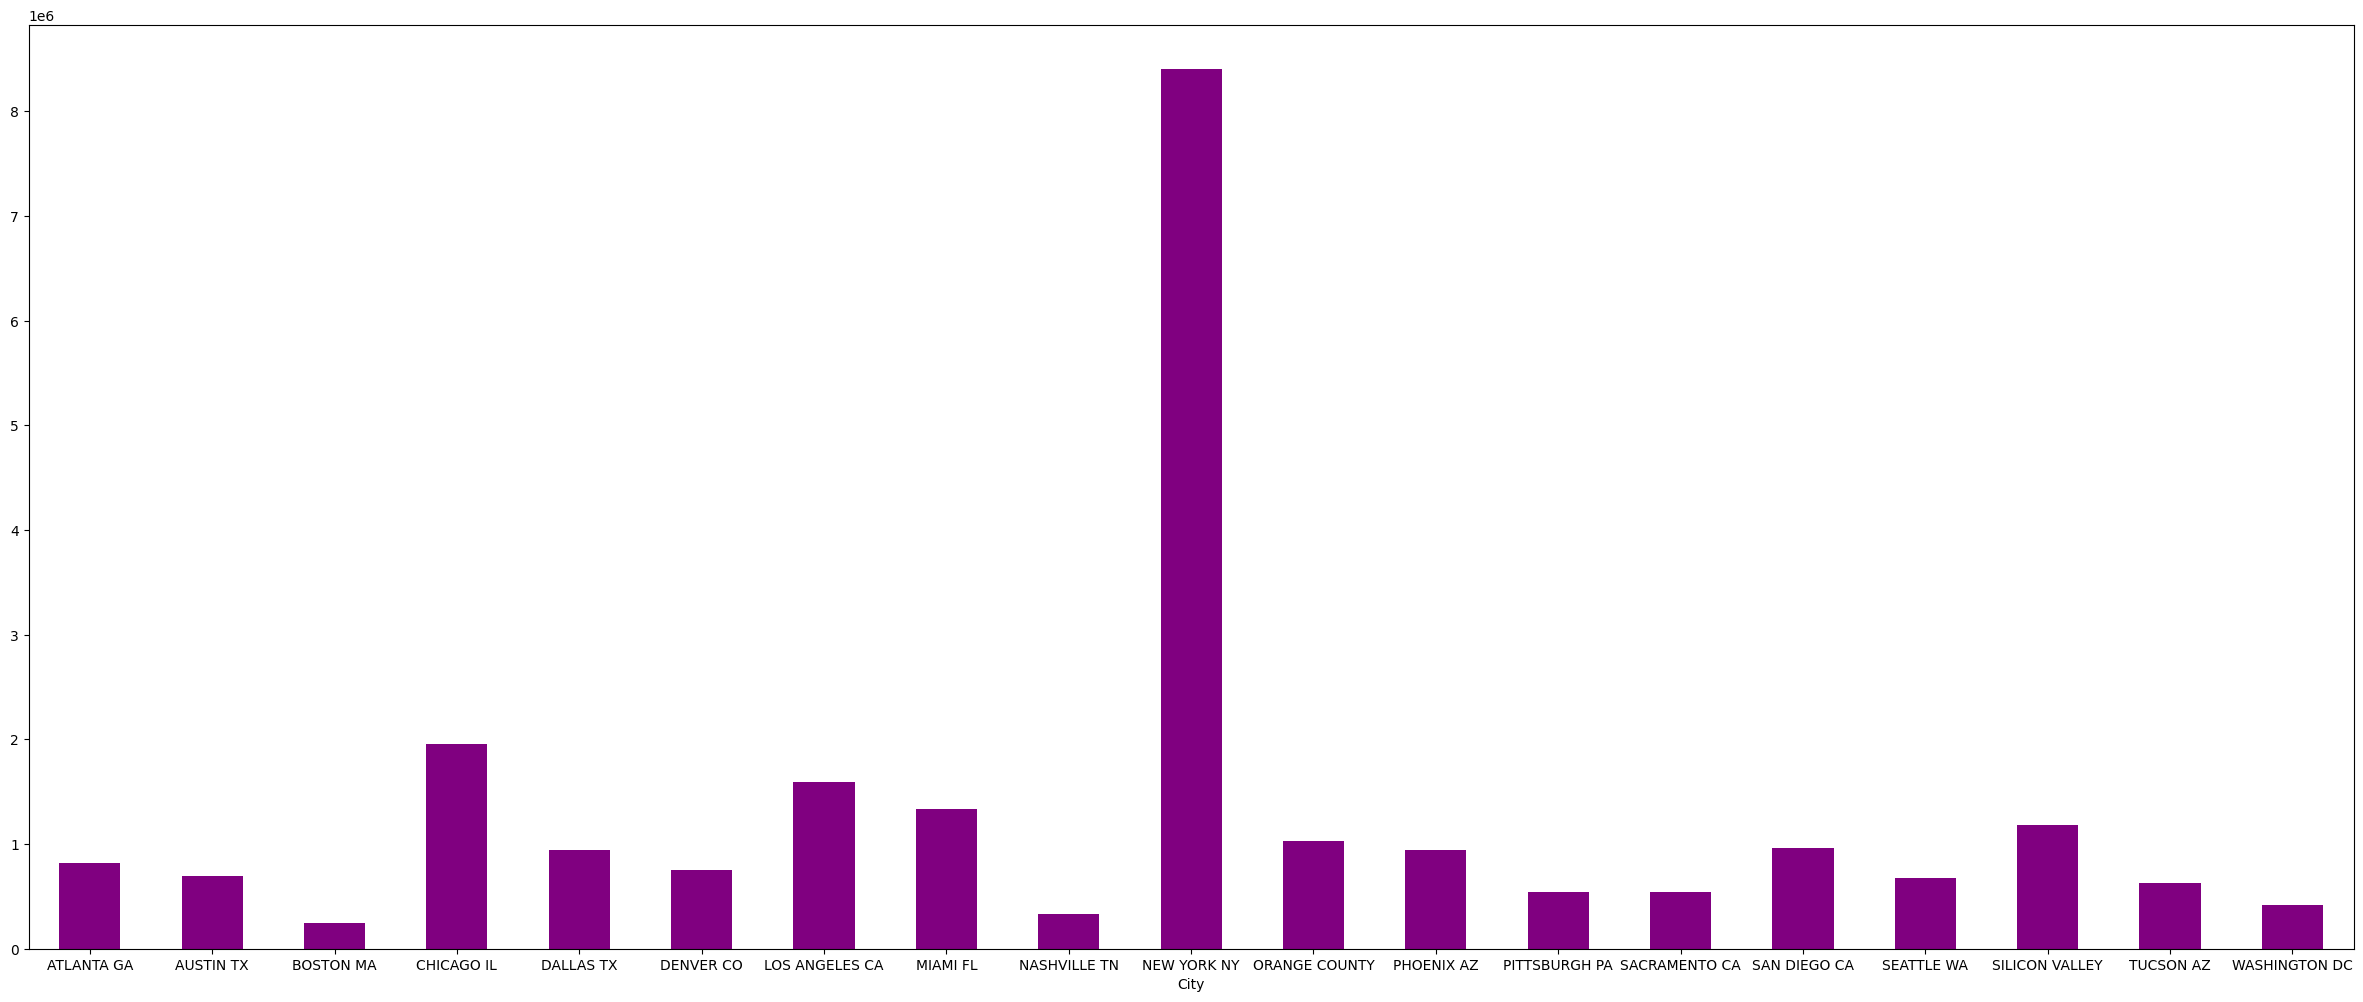

In [66]:
f, ax = plt.subplots(figsize=(30, 12))
ax = pop_data.plot.bar(rot=0,color="purple")

# **CONCLUSION**:We already found that population and profit has really correlation in our heatmap. When we examine the profit and population graphs, we can clearly see that it is correct.

# **SUMMARY**

# The two cabs firms, Pink Cab and Yellow Cab, have different data dynamics, as shown by the aforementioned Exploratory Data Analysis (EDA). We discovered that the master dataframe contains no null values. It appears like Yellow Cab is making more money than Pink Cab. Users prefer yellow cabs over pink ones. On the other hand, the pink cab's profit is rising over time while the yellow cab's is declining. Due to the fact that December is often a holiday month, it has been observed that this month has the highest number of journeys. In conclusion, it would be best to invest in a pink cab since it shows a great increasing trend meanwhile yellow cab shows decreasing trend.
